<a href="https://colab.research.google.com/github/neffer77/CSCE5218_Project/blob/Rinoj_Gautam/DL_project_Rinoj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import glob as gb
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,GlobalAveragePooling2D
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score
import os

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [83]:
train_data = '/content/drive/MyDrive/yawn_eye_dataset/dataset_new/train/'
test_data = '/content/drive/MyDrive/yawn_eye_dataset/dataset_new/test/'

In [84]:
for folder in  os.listdir(train_data):
    files = gb.glob(pathname= str( train_data + folder + '/*.jpg'))
    print(f'For data , found {len(files)} in folder {folder}')

For data , found 617 in folder Closed
For data , found 616 in folder no_yawn
For data , found 617 in folder Open
For data , found 617 in folder yawn


In [85]:

features = {'Closed':0, 'Open':1, 'no_yawn':2,'yawn':3}
def getcode(n) :
    for one , two in features.items() :
       if n == two :
            return one

In [86]:
size = []
for folder in os.listdir(train_data) :
    files = gb.glob(pathname= str( train_data + folder + '/*.jpg'))
    for file in files:
        image = plt.imread(file)
        size.append(image.shape)

pd.Series(size).value_counts

<bound method IndexOpsMixin.value_counts of 0       (145, 145, 3)
1       (287, 288, 3)
2       (127, 131, 3)
3       (123, 141, 3)
4       (135, 142, 3)
            ...      
2462    (480, 640, 3)
2463    (480, 640, 3)
2464    (480, 640, 3)
2465    (480, 640, 3)
2466    (480, 640, 3)
Length: 2467, dtype: object>

In [87]:
pic_size = 140
Train_x = []
Train_y = []
for folder in  os.listdir(train_data) :
    files = gb.glob(pathname= str( train_data + folder + '/*.jpg'))
    for file in files:
      image = cv2.imread(file)
      image_array = cv2.resize(image,(pic_size,pic_size))
      Train_x.append(list(image_array))
      Train_y.append(features[folder])


In [88]:
print(Train_y)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [89]:
import tensorflow.keras as keras
num_classes = 4
Train_y = keras.utils.to_categorical(Train_y, num_classes)

In [90]:

print(Train_y)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [91]:
Train_y.shape

(2467, 4)

In [92]:
print(f'we have {len(Train_x)} items in Train_x')
print(f'we have {len(Train_y)} items in Train_y')

we have 2467 items in Train_x
we have 2467 items in Train_y


In [93]:
X_test = []
y_test = []
for folder in  os.listdir(test_data) :
    files = gb.glob(pathname= str( test_data + folder + '/*.jpg'))
    for file in files:
      image = cv2.imread(file)
      image_array = cv2.resize(image , (pic_size,pic_size))
      X_test.append(list(image_array))
      y_test.append(features[folder])

In [94]:
y_test = keras.utils.to_categorical(y_test, 4)

In [95]:
print(f'we have {len(X_test)} items in X_Test')
print(f'we have {len(y_test)} items in Y_Test')

we have 433 items in X_Test
we have 433 items in Y_Test


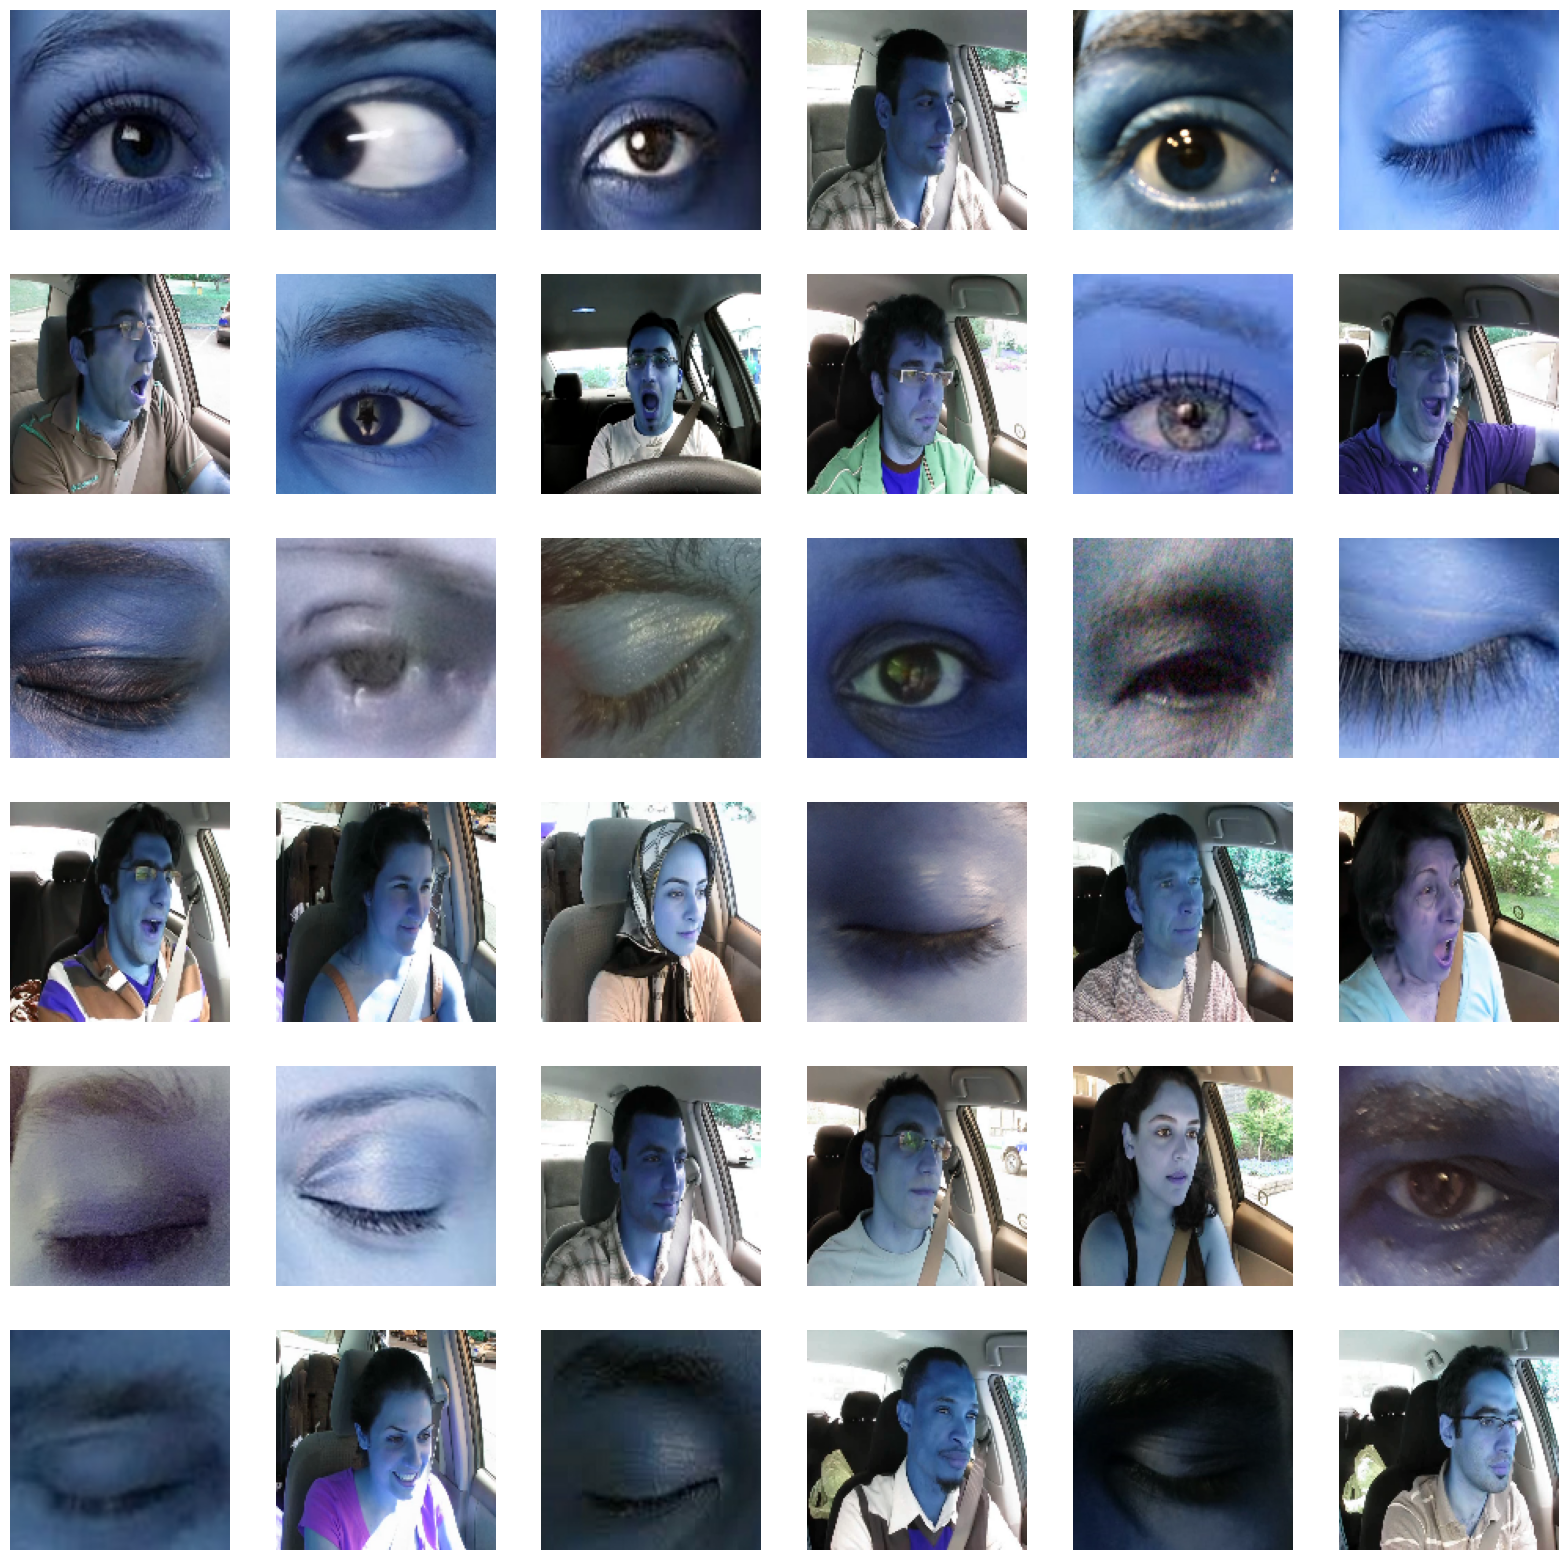

In [142]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(Train_x),36))) :
    plt.subplot(6,6,n+1)
    plt.imshow(Train_x[i])
    plt.axis('off')


In [96]:
X_train, X_val, y_train, y_val = train_test_split(Train_x, Train_y, test_size=0.2, shuffle=True, random_state=0)

X_train1 = np.array(X_train)
y_train1 = np.array(y_train)

X_val1 = np.array(X_val)
y_val1 = np.array(y_val)

In [97]:
X_train1.shape

(1973, 140, 140, 3)

In [98]:
y_train1.shape

(1973, 4)

In [99]:
X_val1.shape


(494, 140, 140, 3)

In [100]:
y_val1.shape

(494, 4)

In [101]:
model = Sequential([
        Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(pic_size,pic_size,3)),
        Conv2D(32,kernel_size=(3,3),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(64,kernel_size=(5,5),activation='relu'),
        Conv2D(64,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        Conv2D(128,kernel_size=(5,5),activation='relu'),
        MaxPooling2D(2,2),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Conv2D(256,kernel_size=(3,3),activation='relu'),
        Flatten() ,
        Dense(512,activation='relu') ,
        Dense(512,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(256,activation='relu') ,
        Dense(128,activation='relu') ,
        Dense(4,activation='softmax') ,
        ])

In [102]:
optimizer= tf.keras.optimizers.Adam(learning_rate=0.00008)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 138, 138, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 136, 136, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 68, 68, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 64, 64, 64)        51264     
                                                                 
 conv2d_27 (Conv2D)          (None, 60, 60, 64)        102464    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                

In [104]:
data_generator = ImageDataGenerator(horizontal_flip=True, rotation_range=10, zoom_range=0.2,
                             brightness_range=(0.1, 0.8))

In [105]:
batch_size = 32
img_iter = data_generator.flow(X_train1, y_train1, batch_size=batch_size)

In [106]:
data_generator.fit(X_train1)

In [107]:
epochs = 10
Model = model.fit(img_iter, epochs=epochs, validation_data=(X_val1,y_val1), validation_steps=1, verbose=1)

Epoch 1/10
62/62 [==============================] - 433s 7s/step - loss: 0.8143 - accuracy: 0.6483 - val_loss: 1.0155 - val_accuracy: 0.6862
Epoch 2/10
62/62 [==============================] - 393s 6s/step - loss: 0.5545 - accuracy: 0.7456 - val_loss: 0.6839 - val_accuracy: 0.7227
Epoch 3/10
62/62 [==============================] - 392s 6s/step - loss: 0.4860 - accuracy: 0.7704 - val_loss: 0.5075 - val_accuracy: 0.7976
Epoch 4/10
62/62 [==============================] - 410s 7s/step - loss: 0.4399 - accuracy: 0.7805 - val_loss: 0.5125 - val_accuracy: 0.7915
Epoch 5/10
62/62 [==============================] - 408s 7s/step - loss: 0.3918 - accuracy: 0.8039 - val_loss: 0.3777 - val_accuracy: 0.8320
Epoch 6/10
62/62 [==============================] - 411s 7s/step - loss: 0.3792 - accuracy: 0.8135 - val_loss: 0.5819 - val_accuracy: 0.8117
Epoch 7/10
62/62 [==============================] - 386s 6s/step - loss: 0.3624 - accuracy: 0.8251 - val_loss: 0.4868 - val_accuracy: 0.8077
Epoch 8/10
62

In [108]:
temp2 = list(zip(X_test, y_test))
random.shuffle(temp2)
X_test, y_test = zip(*temp2)
X_test, y_test = np.array(X_test), np.array(y_test)

Loss,Accuracy = model.evaluate(X_test, y_test,batch_size=32)

print('Test Loss is {}'.format(Loss))
print('Test Accuracy is {}'.format(Accuracy ))

14/14 [==============================] - 20s 1s/step - loss: 0.6165 - accuracy: 0.7806
Test Loss is 0.6164924502372742
Test Accuracy is 0.7806004881858826


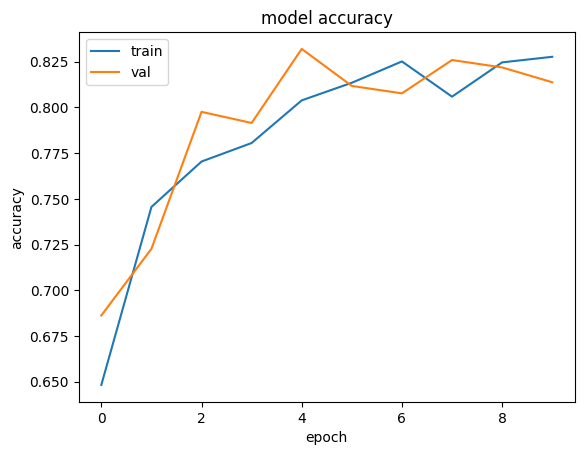

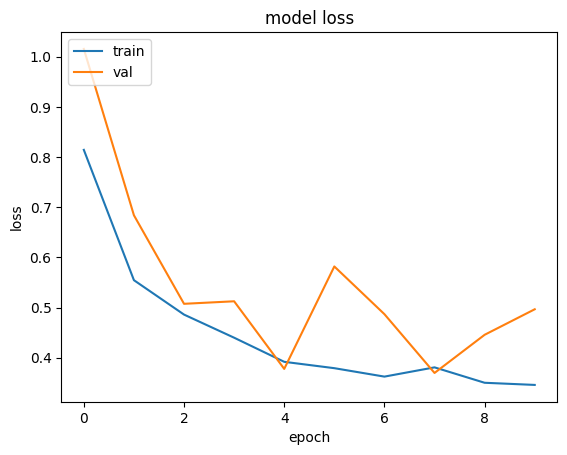

In [109]:
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()